In [1]:
import os
import sys
sys.path.insert(0, os.path.pardir)

from database import db
from database.models import Workout, User
from database import preprocessing as pp

In [2]:
import warnings
import ipympl
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import numpy as np
import pandas as pd
from pprint import pprint
from shapely import wkt, wkb
from geoalchemy2 import Geography
from geopy.distance import vincenty

In [3]:
%matplotlib ipympl
warnings.filterwarnings('ignore')

In [4]:
session = db.connect_db()

We query workouts ordered by the difference between `calculated_length` and `distance_total` (`diff_length` column):

In [8]:
sample = session.query(Workout.id, Workout.id_user, Workout.distance,
                       Workout.start_datetime, Workout.source).order_by(Workout.id.asc())
df = pd.read_sql(sample.statement, sample.session.bind)

In [1]:
groups = df.groupby('id_user')
#counter = 0
#total = len(groups)
#for group in groups:
    # [0]: id
    # [1]: group df
#    if (len(group[1]) <= 3):
        #print(group[0], len(group[1]))
#        counter+=1
        
group_lengths = [len(g[1]) for g in groups]

NameError: name 'df' is not defined

In [60]:
plt.figure()
plt.hist(group_lengths, bins=50);

FigureCanvasNbAgg()

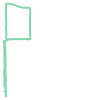

In [12]:
#121704913
#98369986
workout = session.query(Workout).filter_by(id=29524692).first()
raw_trajectory = wkt.loads(session.scalar(workout.raw_trajectory.ST_AsText()))
trajectory = pp.remove_redundant_points(str(raw_trajectory))
raw_trajectory